In [2]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

Python version: 3.9.5 (tags/v3.9.5:0a7dcbd, May  3 2021, 17:27:52) [MSC v.1928 64 bit (AMD64)]
pandas version: 2.2.3
matplotlib version: 3.9.4
NumPy version: 2.0.2
SciPy version: 1.13.1
IPython version: 8.18.1
scikit-learn version: 1.6.0


In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], 
    iris_dataset['target'], 
    test_size=0.5,  # 50% for testing, 50% for training
    random_state=0
)

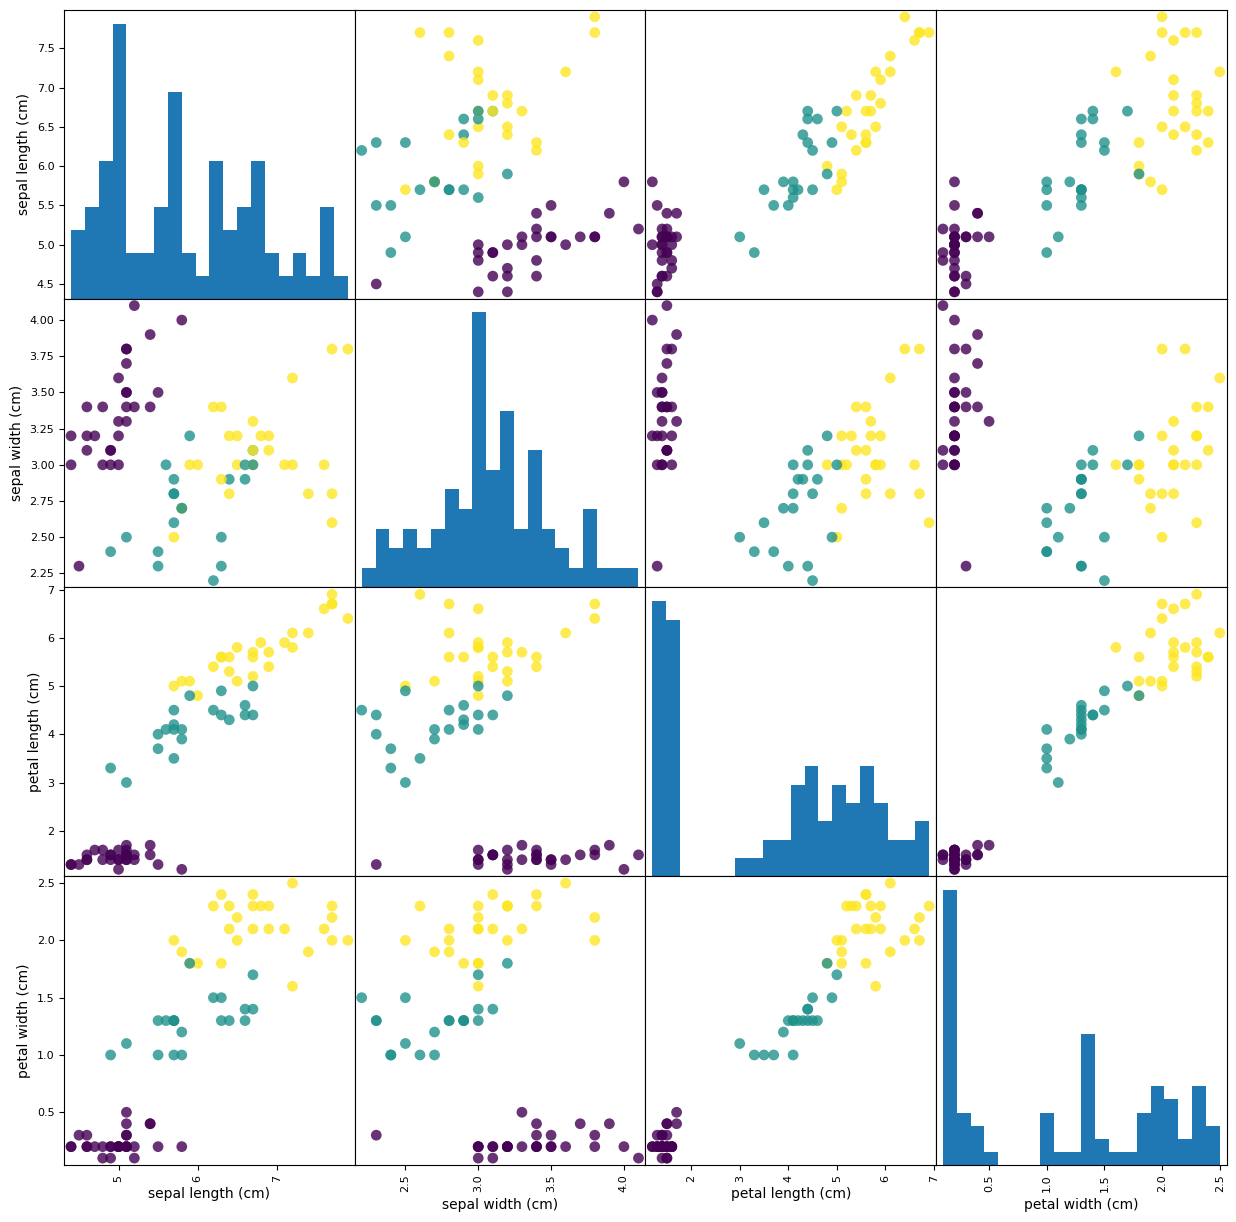

In [5]:
from pandas.plotting import scatter_matrix

# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
grr = scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
hist_kwds={'bins': 20}, s=60, alpha=.8, cmap='viridis')

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [8]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [9]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
metric_params=None, n_jobs=1, n_neighbors=1, p=2,
weights='uniform')

KNeighborsClassifier(n_jobs=1, n_neighbors=1)

In [10]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
iris_dataset['target_names'][prediction]))

X_new.shape: (1, 4)
Prediction: [0]
Predicted target name: ['setosa']


In [11]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 2 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 1 1 1 1 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1]


In [12]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.91


In [13]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.91
